In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [62]:
def create_gauss_filter(h, w, k_size, sigma):
    nucleo_g = cv.getGaussianKernel(ksize=k_size, sigma=sigma) 
    n=nucleo_g*nucleo_g. T
    print(n.shape)
    z=np.zeros((h,w))
    pad_w=w//2-k_size//2
    pad_h=h//2-k_size//2
    padding=((pad_h,pad_h),(pad_w,pad_w))
    z=np.pad(n,padding,'constant', constant_values=np.zeros_like(padding))
    return (z,np.fft.fft2(z))


Implementar la función **create_gauss_filter(h, w, k_size, sigma)** para crear filtros gaussianos para
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada
de Fourier.
1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una
imagen para validar el funcionamiento en el dominio espectral.
2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape-from-focus”

In [96]:
img = cv.imread('chewbacca.jpg', cv.IMREAD_GRAYSCALE)
img.shape

img=img[0:-1,0:-1]  #Saco la ultima fila y columna para que quede impar, queda revisarlo - TODO

(25, 25)


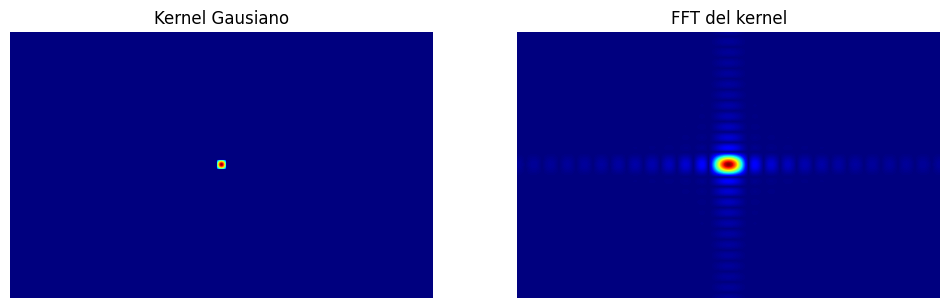

In [97]:
kernel, kernel_tf = create_gauss_filter(h=img.shape[0], w=img.shape[1], k_size=15, sigma=10)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

Text(0.5, 1.0, 'Desenfoque gausiano')

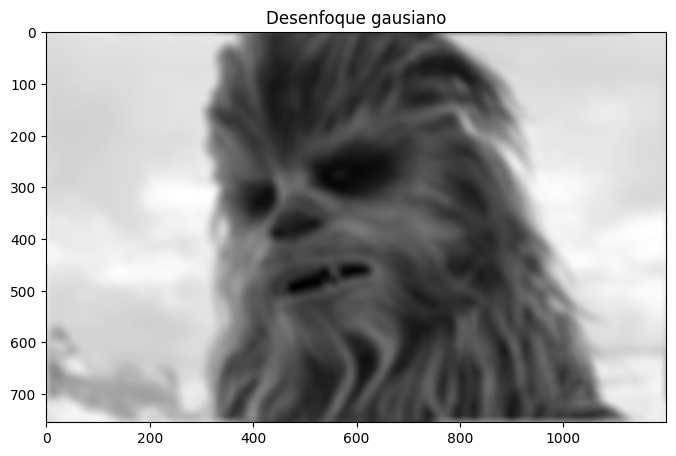

In [98]:
img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')